In [1]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [2]:
from tempForecast.components.data_transformation import WeatherDatabase
from tempForecast.components.data_ingestion import weather_scraping

In [3]:
data = weather_scraping().load_data()
# on instancie la classe avec la base de donnée déjà chargé pour ne pas rescrapé tout
# si on met last_df en argument cela va scrapper seulement depuis la dernière date du df donc enlever pour éviter une interpolation
data_ingestion = weather_scraping(last_df=data)
# scraping 

data = data_ingestion.web_scraping()
# il faut ajouter cette base à la db
data_ingestion.load_data(df=data)
data = WeatherDatabase().load_data_and_transform()

2023-11-27 18:34:16.377180
https://www.infoclimat.fr/observations-meteo/archives/27/novembre/2023/paris-5eme-tour-zamansky-jussieu/000BV.html?dixminutes


c:\users\zbook create g7\desktop\temperature forecasting\src\tempForecast\components\data_ingestion.py:65: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  date_text = BeautifulSoup(


2023-11-26 18:34:16.377180
https://www.infoclimat.fr/observations-meteo/archives/26/novembre/2023/paris-5eme-tour-zamansky-jussieu/000BV.html?dixminutes


c:\users\zbook create g7\desktop\temperature forecasting\src\tempForecast\components\data_ingestion.py:65: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  date_text = BeautifulSoup(


2023-11-25 18:34:16.377180
https://www.infoclimat.fr/observations-meteo/archives/25/novembre/2023/paris-5eme-tour-zamansky-jussieu/000BV.html?dixminutes


c:\users\zbook create g7\desktop\temperature forecasting\src\tempForecast\components\data_ingestion.py:65: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  date_text = BeautifulSoup(


2023-11-24 18:34:16.377180
https://www.infoclimat.fr/observations-meteo/archives/24/novembre/2023/paris-5eme-tour-zamansky-jussieu/000BV.html?dixminutes


c:\users\zbook create g7\desktop\temperature forecasting\src\tempForecast\components\data_ingestion.py:65: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  date_text = BeautifulSoup(


2023-11-23 18:34:16.377180
https://www.infoclimat.fr/observations-meteo/archives/23/novembre/2023/paris-5eme-tour-zamansky-jussieu/000BV.html?dixminutes


c:\users\zbook create g7\desktop\temperature forecasting\src\tempForecast\components\data_ingestion.py:65: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  date_text = BeautifulSoup(


2023-11-22 18:34:16.377180
https://www.infoclimat.fr/observations-meteo/archives/22/novembre/2023/paris-5eme-tour-zamansky-jussieu/000BV.html?dixminutes


c:\users\zbook create g7\desktop\temperature forecasting\src\tempForecast\components\data_ingestion.py:65: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  date_text = BeautifulSoup(


Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.


In [4]:
#data["unique_id"] = "temp"
data.rename(columns={"température":"y"}, inplace=True)
#data.rename(columns={"datetime":"ds"}, inplace=True)

data['y'].fillna(method='bfill', inplace=True)
data['vent'].fillna(method='bfill', inplace=True)
data['rafales'].fillna(0, inplace=True)
data['vent_direction'].fillna(0, inplace=True)
data['pt_de_rosee'].fillna(0, inplace=True)
data['humidite'].fillna(0, inplace=True)


C:\Users\Zbook Create G7\AppData\Local\Temp\ipykernel_14960\3164910419.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['y'].fillna(method='bfill', inplace=True)
C:\Users\Zbook Create G7\AppData\Local\Temp\ipykernel_14960\3164910419.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['vent'].fillna(method='bfill', inplace=True)


In [5]:
data.drop(columns=['bio_meteo','radiation_solaire'], inplace=True)
data.drop(columns='id', inplace=True)


In [6]:
data = data.sort_index()

In [7]:
data

,datetime,y,vent,rafales,vent_direction,humidite,pt_de_rosee,pression
datetime,,,,,,,,
2022-09-18 00:00:00,2022-09-18 00:00:00,11.6,5.0,11.3,297.0,66.0,5.6,1020.1
2022-09-18 00:10:00,2022-09-18 00:10:00,11.6,6.0,14.5,275.0,66.0,5.6,1020.1
2022-09-18 00:20:00,2022-09-18 00:20:00,11.5,3.0,8.0,304.0,66.0,5.6,1020.0
2022-09-18 00:30:00,2022-09-18 00:30:00,11.4,5.0,11.3,229.0,67.0,5.6,1020.0
2022-09-18 00:40:00,2022-09-18 00:40:00,11.4,3.0,8.0,318.0,67.0,5.6,1020.0
...,...,...,...,...,...,...,...,...
2023-11-27 16:50:00,2023-11-27 16:50:00,8.7,11.0,24.1,260.0,93.0,7.8,995.4
2023-11-27 17:00:00,2023-11-27 17:00:00,8.7,13.0,0.0,0,92.0,7.8,995.4
2023-11-27 17:10:00,2023-11-27 17:10:00,8.8,15.0,0.0,0,92.0,7.8,995.3


In [8]:
data = data["y"]
data = data.asfreq('10T')
steps = 144*7
data_train = data[:-steps]
data_test  = data[-steps:]

In [9]:
type(data_train.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [10]:
data.shape

(62746,)

In [11]:
data

datetime
2022-09-18 00:00:00    11.6
2022-09-18 00:10:00    11.6
2022-09-18 00:20:00    11.5
2022-09-18 00:30:00    11.4
2022-09-18 00:40:00    11.4
                       ... 
2023-11-27 16:50:00     8.7
2023-11-27 17:00:00     8.7
2023-11-27 17:10:00     8.8
2023-11-27 17:20:00     8.8
2023-11-27 17:30:00     8.8
Freq: 10T, Name: y, Length: 62746, dtype: float64

C:\Users\Zbook Create G7\AppData\Local\Temp\ipykernel_14960\1179733072.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_test.fillna(method="bfill").plot(ax=ax, label='test')


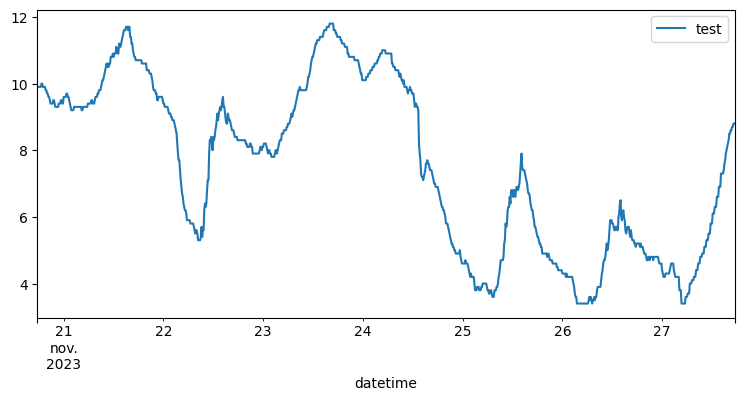

In [12]:
fig, ax=plt.subplots(figsize=(9, 4))
#data_train.plot(ax=ax, label='train')
data_test.fillna(method="bfill").plot(ax=ax, label='test')
ax.legend()

In [13]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

In [47]:
list(range(1,24*6*7))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [55]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                    regressor = Ridge(random_state=2, alpha=0.3),
                    lags      = range(1,24*6*7),
                    differentiation=1

                )

forecaster.fit(y=data_train.fillna(method='bfill'))
forecaster


C:\Users\Zbook Create G7\AppData\Local\Temp\ipykernel_14960\1935891510.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forecaster.fit(y=data_train.fillna(method='bfill'))


ForecasterAutoreg 
Regressor: Ridge(alpha=0.3, random_state=2) 
Lags: [   1    2    3 ... 1005 1006 1007] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1008 
Weight function included: False 
Differentiation order: 1 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2022-09-18 00:00:00'), Timestamp('2023-11-20 17:30:00')] 
Training index type: DatetimeIndex 
Training index frequency: 10T 
Regressor parameters: {'alpha': 0.3, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': 2, 'solver': 'auto', 'tol': 0.0001} 
fit_kwargs: {} 
Creation date: 2023-11-27 18:46:39 
Last fit date: 2023-11-27 18:46:41 
Skforecast version: 0.11.0 
Python version: 3.10.10 
Forecaster id: None 

In [56]:
data_test.index

DatetimeIndex(['2023-11-20 17:40:00', '2023-11-20 17:50:00',
               '2023-11-20 18:00:00', '2023-11-20 18:10:00',
               '2023-11-20 18:20:00', '2023-11-20 18:30:00',
               '2023-11-20 18:40:00', '2023-11-20 18:50:00',
               '2023-11-20 19:00:00', '2023-11-20 19:10:00',
               ...
               '2023-11-27 16:00:00', '2023-11-27 16:10:00',
               '2023-11-27 16:20:00', '2023-11-27 16:30:00',
               '2023-11-27 16:40:00', '2023-11-27 16:50:00',
               '2023-11-27 17:00:00', '2023-11-27 17:10:00',
               '2023-11-27 17:20:00', '2023-11-27 17:30:00'],
              dtype='datetime64[ns]', name='datetime', length=1008, freq='10T')

In [57]:
# Predict
# ==============================================================================
steps = 144 * 7
predictions = forecaster.predict(steps=steps)
# Add datetime index to predictions
predictions = pd.Series(data=predictions, index=data_test.index)
predictions.head(3)


datetime
2023-11-20 17:40:00    9.980788
2023-11-20 17:50:00    9.951586
2023-11-20 18:00:00    9.929525
Freq: 10T, Name: pred, dtype: float64

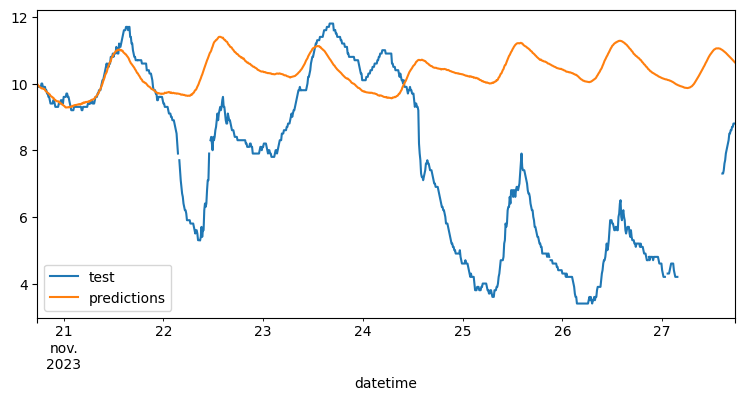

In [58]:
fig, ax=plt.subplots(figsize=(9, 4))
#data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend()

In [59]:
# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test.fillna(method="bfill"),
                y_pred = predictions
            )
print(f"Test error (mse): {error_mse}")


Test error (mse): 14.770021627998318


C:\Users\Zbook Create G7\AppData\Local\Temp\ipykernel_14960\3216005815.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_true = data_test.fillna(method="bfill"),
